## Data Analysis on Electric Vehicle


### 1. Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import plotly.express as px

### 2. Understanding the data

In [2]:
df = pd.read_csv("dataset.csv")

df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [3]:
df.shape

(112634, 17)

In [4]:
df.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

Let's clean the columns, by removing Spaces and Special Characters.

### 3. Data Cleaning

#### Renaming columns

In [5]:
clean_columns = {
    'VIN (1-10)': 'VIN_1_10',
    'Postal Code': 'Postal_Code',
    'Model Year': 'Model_Year',
    'Electric Vehicle Type': 'Electric_Vehicle_Type',
    'Clean Alternative Fuel Vehicle (CAFV) Eligibility': 'CAFV_Eligibility',
    'Electric Range': 'Electric_Range',
    'Base MSRP': 'Base_MSRP',
    'Legislative District': 'Legislative_District',
    'DOL Vehicle ID': 'DOL_Vehicle_ID',
    'Vehicle Location': 'Vehicle_Location',
    'Electric Utility': 'Electric_Utility',
    '2020 Census Tract': 'Census_Tract_2020'
}

df.rename(columns=clean_columns, inplace=True)

In [6]:
df.columns

Index(['VIN_1_10', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility',
       'Electric_Range', 'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', 'Census_Tract_2020'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VIN_1_10               112634 non-null  object 
 1   County                 112634 non-null  object 
 2   City                   112634 non-null  object 
 3   State                  112634 non-null  object 
 4   Postal_Code            112634 non-null  int64  
 5   Model_Year             112634 non-null  int64  
 6   Make                   112634 non-null  object 
 7   Model                  112614 non-null  object 
 8   Electric_Vehicle_Type  112634 non-null  object 
 9   CAFV_Eligibility       112634 non-null  object 
 10  Electric_Range         112634 non-null  int64  
 11  Base_MSRP              112634 non-null  int64  
 12  Legislative_District   112348 non-null  float64
 13  DOL_Vehicle_ID         112634 non-null  int64  
 14  Vehicle_Location       112610 non-nu

In [8]:
df.head()

,VIN_1_10,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,CAFV_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,Census_Tract_2020
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,NaN,198968248,POINT (-81.80023 24.5545),NaN,12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,NaN,5204412,POINT (-114.57245 35.16815),NaN,32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


#### Handling duplicates

In [9]:
df.duplicated().sum()

0

#### Handling missing values

In [10]:
df.isnull().sum().sort_values(ascending=False)

Electric_Utility         443
Legislative_District     286
Vehicle_Location          24
Model                     20
VIN_1_10                   0
CAFV_Eligibility           0
DOL_Vehicle_ID             0
Base_MSRP                  0
Electric_Range             0
Electric_Vehicle_Type      0
County                     0
Make                       0
Model_Year                 0
Postal_Code                0
State                      0
City                       0
Census_Tract_2020          0
dtype: int64

In [11]:
df_num = df.select_dtypes(include=["int64", "float64"])

df_cat = df.select_dtypes(include=["object"])

**Numerical Columns**

In [12]:
df_num.isnull().sum().sort_values(ascending=False)

Legislative_District    286
Postal_Code               0
Model_Year                0
Electric_Range            0
Base_MSRP                 0
DOL_Vehicle_ID            0
Census_Tract_2020         0
dtype: int64

In [13]:
# Impute missing values with mean/median using Simple Imputer
simple_median = SimpleImputer(strategy="median")
simple_median

SimpleImputer(strategy='median')

In [14]:
df_num[["Legislative_District"]]= simple_median.fit_transform(df[["Legislative_District"]])

df_num.isnull().sum().sort_values(ascending=False)

Postal_Code             0
Model_Year              0
Electric_Range          0
Base_MSRP               0
Legislative_District    0
DOL_Vehicle_ID          0
Census_Tract_2020       0
dtype: int64

**Categorical Columns**

In [15]:
df_cat.isnull().sum().sort_values(ascending=False)

Electric_Utility         443
Vehicle_Location          24
Model                     20
VIN_1_10                   0
County                     0
City                       0
State                      0
Make                       0
Electric_Vehicle_Type      0
CAFV_Eligibility           0
dtype: int64

In [16]:
# Impute missing values with most frequent using Simple Imputer
simple_mostfreq = SimpleImputer(strategy="most_frequent")

simple_mostfreq

SimpleImputer(strategy='most_frequent')

In [17]:
# Impute missing values with mode
null_cols = ["Electric_Utility", "Vehicle_Location", "Model"]

for col in null_cols:
    df_cat[[col]] = simple_mostfreq.fit_transform(df_cat[[col]])

df_cat.isnull().sum().sort_values(ascending=False)

VIN_1_10                 0
County                   0
City                     0
State                    0
Make                     0
Model                    0
Electric_Vehicle_Type    0
CAFV_Eligibility         0
Vehicle_Location         0
Electric_Utility         0
dtype: int64

## Task 1: Exploratory Data Analysis (EDA)

### 4. Univariate Analysis

#### i) Statistical Non Visual Analysis

**Numerical Columns**

In [18]:
def numerical_univariate_analysis(numerical_df):
    for col in numerical_df:
        print("*"*10, col, "*"*10)
        print(numerical_df[col].agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis']))
        print()

In [19]:
numerical_univariate_analysis(df_num)

********** Postal_Code **********
min          1730.000000
max         99701.000000
mean        98156.226850
median      98119.000000
std          2648.733064
skew          -27.955285
kurtosis      820.874840
Name: Postal_Code, dtype: float64

********** Model_Year **********
min         1997.000000
max         2023.000000
mean        2019.003365
median      2020.000000
std            2.892364
skew          -0.817579
kurtosis      -0.001160
Name: Model_Year, dtype: float64

********** Electric_Range **********
min           0.000000
max         337.000000
mean         87.812987
median       32.000000
std         102.334216
skew          0.817103
kurtosis     -0.876312
Name: Electric_Range, dtype: float64

********** Base_MSRP **********
min              0.000000
max         845000.000000
mean          1793.439681
median           0.000000
std          10783.753486
skew            10.100497
kurtosis       371.695682
Name: Base_MSRP, dtype: float64

********** Legislative_District ******

**Insights:**

**Positive Skew (Right-Skewed)**
- `Electric_Range` has a skew of **0.817**, which means it's right-skewed. So, there are more vehicles with shorter electric ranges, but a few with significantly higher ranges (outliers).
- `Base_MSRP` has a **very high positive skew (10.1)**, indicating that most vehicles are on the lower price range, but there are a few with **extremely high prices**.

**Negative Skew (Left-Skewed)**
- `Postal_Code` has a skew of **-27.95**, which indicates extreme left-skewness. There are very few postal codes that are much lower compared to the rest.
- `Model_Year` has a skew of **-0.817**, showing that most cars are of newer model years, but some older vehicles pull the tail on the left.

**High Kurtosis (Leptokurtic)**
- `Postal_Code` has a kurtosis of **820.87**, indicating that there are **many extreme values** in the dataset, which results in very heavy tails.
- `Base_MSRP` has a kurtosis of **371.69**, showing that a few vehicles with **very high prices** are pulling the tails up, leading to outliers.
  
**Low Kurtosis (Platykurtic)**
- `Electric_Range` has a kurtosis of **-0.876**, indicating that the values are more **uniformly spread** with fewer outliers.

**Categorical Columns**

In [20]:
def categorical_univariate_analysis(categorical_df):
    for col in categorical_df:
        print("*"*25, col, "*"*25)
        print(categorical_df[col].agg(["unique", "nunique", "count"]))
        print("Value Counts:\n", categorical_df[col].value_counts())
        print()

In [21]:
categorical_univariate_analysis(df_cat)

************************* VIN_1_10 *************************
unique     [JTMEB3FV6N, 1G1RD6E45D, JN1AZ0CP8B, 1G1FW6S08...
nunique                                                 7548
count                                                 112634
Name: VIN_1_10, dtype: object
Value Counts:
 VIN_1_10
5YJYGDEE9M    472
5YJYGDEE0M    465
5YJYGDEE8M    448
5YJYGDEE7M    448
5YJYGDEE2M    437
             ... 
WA1LAAGE9M      1
5UXKT0C50H      1
5YJYGAED3M      1
WDC0G5DBXL      1
YV4ED3GM0P      1
Name: count, Length: 7548, dtype: int64

************************* County *************************
unique     [Monroe, Clark, Yakima, Skagit, Snohomish, Isl...
nunique                                                  165
count                                                 112634
Name: County, dtype: object
Value Counts:
 County
King          59000
Snohomish     12434
Pierce         8535
Clark          6689
Thurston       4126
              ...  
Pinal             1
Elmore            1
Portsmouth 

**Insights:**

- TESLA dominates the Make category (with 52078 occurrences)
- Model 3 and Model Y are the most common vehicles (skewed heavily towards certain vehicle types)

#### ii) Visual Analysis

**Numerical Columns**

In [22]:
df_num.columns

Index(['Postal_Code', 'Model_Year', 'Electric_Range', 'Base_MSRP',
       'Legislative_District', 'DOL_Vehicle_ID', 'Census_Tract_2020'],
      dtype='object')

In [23]:
num_cols = ["Model_Year", "Electric_Range", "Base_MSRP"]

def get_univariate_histplot(numerical_df):
    for col in numerical_df:
        sns.histplot(x=numerical_df[col])
        plt.title(f"Distribution of {col}")
        plt.grid()
        plt.show()
        
def get_univariate_kdeplot(numerical_df):
    for col in numerical_df:
        sns.kdeplot(x=numerical_df[col])
        plt.title(f"Distribution of {col}")
        plt.grid()
        plt.show()
        
def get_univariate_boxplot(numerical_df):
    for col in numerical_df:
        sns.boxplot(x=numerical_df[col])
        plt.title(f"Distribution of {col}")
        plt.grid()
        plt.show()

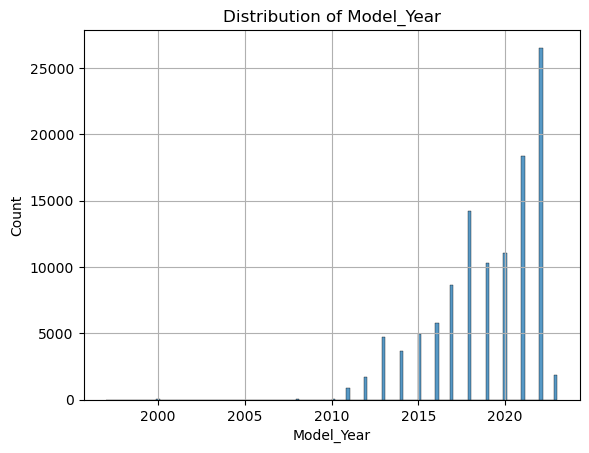

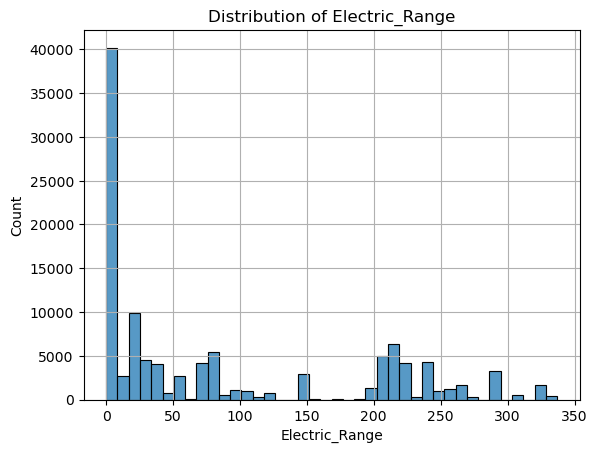

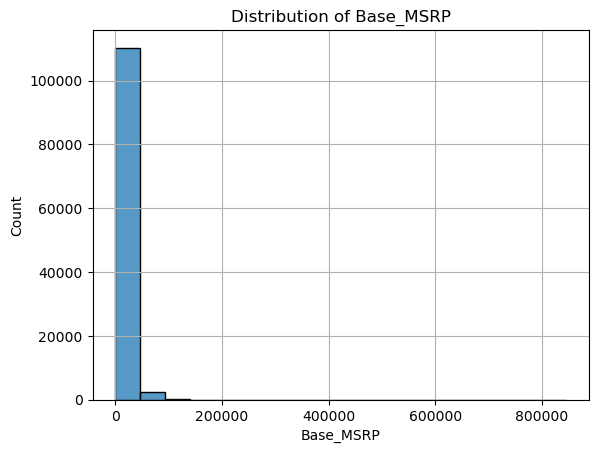

In [24]:
# hist plot
get_univariate_histplot(df_num[num_cols])

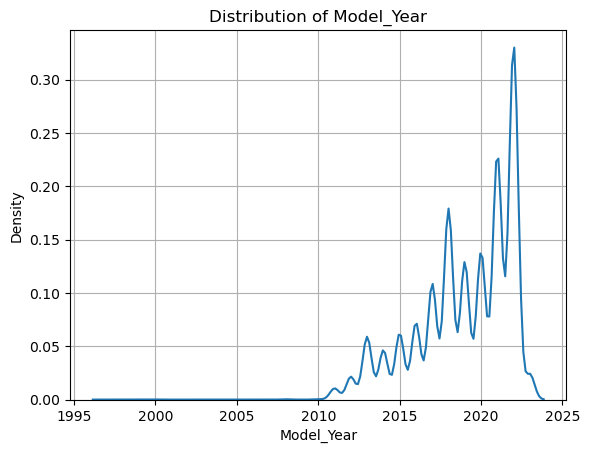

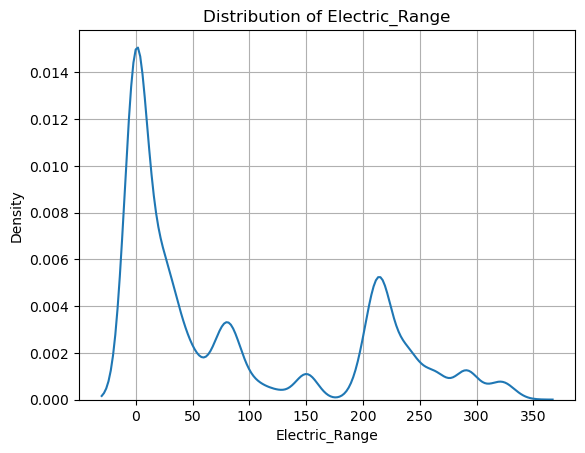

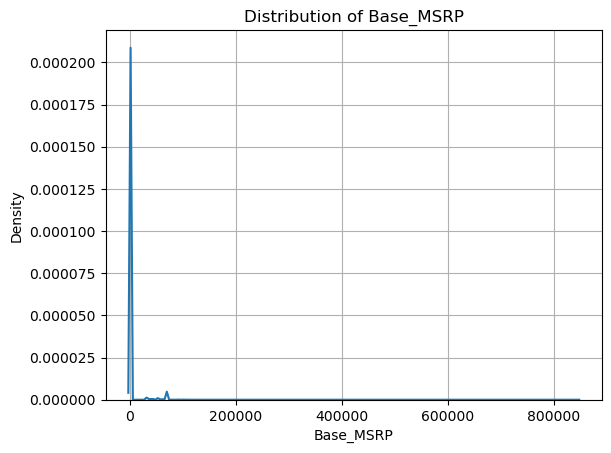

In [25]:
# kde plot
get_univariate_kdeplot(df_num[num_cols])

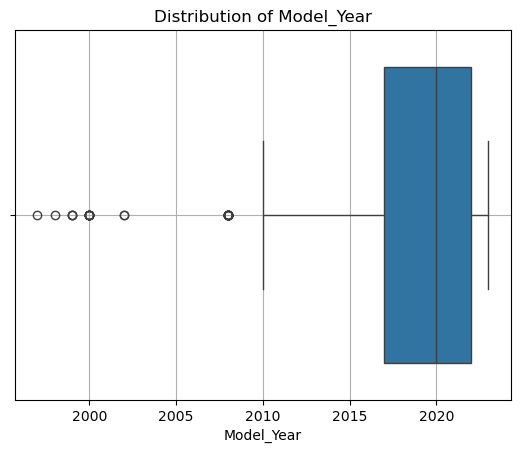

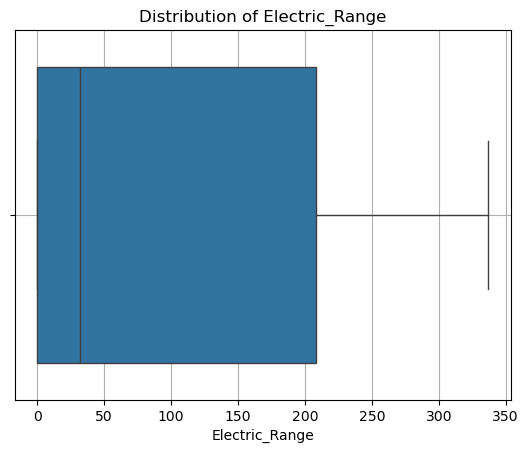

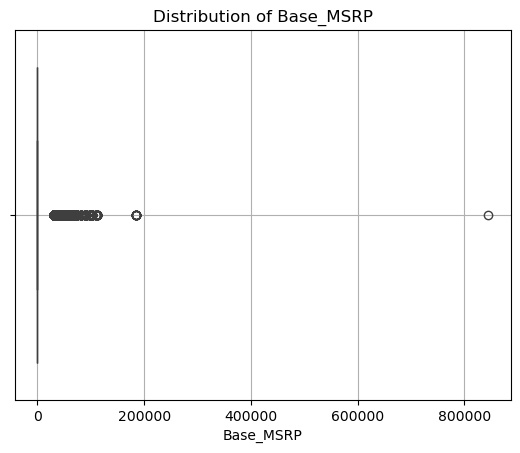

In [26]:
# box plot
get_univariate_boxplot(df_num[num_cols])

**Categorical Columns**

In [27]:
df_cat.columns

Index(['VIN_1_10', 'County', 'City', 'State', 'Make', 'Model',
       'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Vehicle_Location',
       'Electric_Utility'],
      dtype='object')

**Distribution of city**

In [28]:
city = pd.DataFrame(df_cat["City"].value_counts())

city.head()

,count
City,
Seattle,20305
Bellevue,5921
Redmond,4201
Vancouver,4013
Kirkland,3598


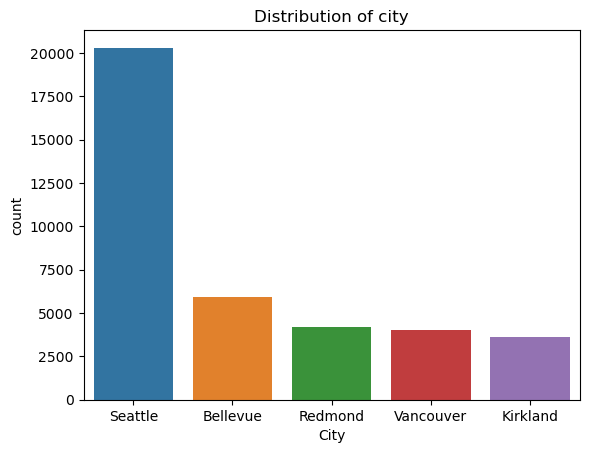

In [29]:
# Bar plot
sns.barplot(x=city.index[:5], y=city["count"][:5], hue=city.index[:5])
plt.title("Distribution of city")
plt.show()

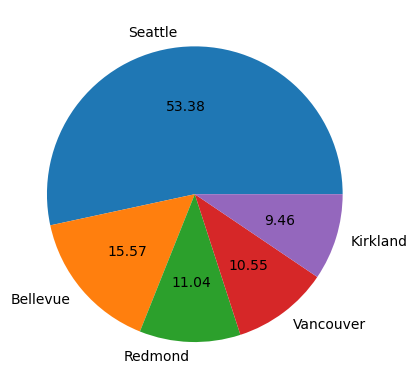

In [30]:
# pie chart
plt.pie(x=city["count"][:5], labels=city.index[:5], autopct="%0.2f")
plt.show()

**Distribution of Make**

In [31]:
make = pd.DataFrame(df_cat["Make"].value_counts())

make.head()

,count
Make,
TESLA,52078
NISSAN,12880
CHEVROLET,10182
FORD,5819
BMW,4680


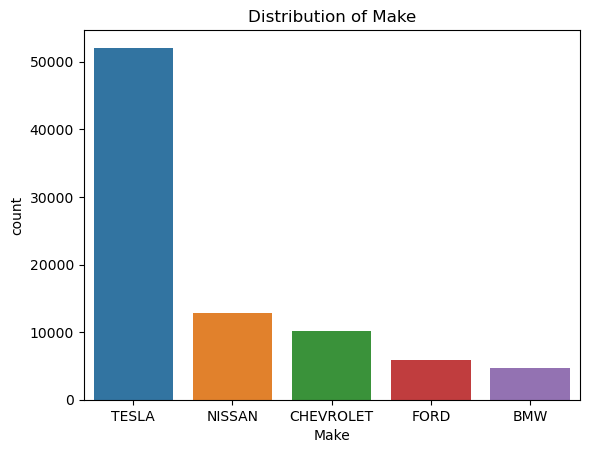

In [32]:
# Bar plot
sns.barplot(x=make.index[:5], y=make["count"][:5], hue=make.index[:5])
plt.title("Distribution of Make")
plt.show()

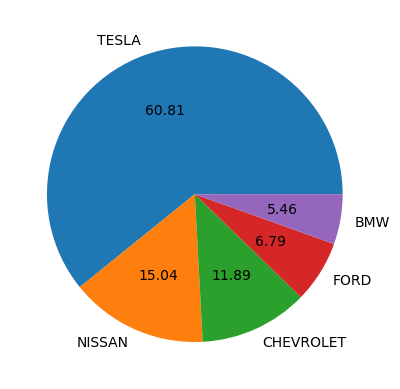

In [33]:
# pie chart
plt.pie(x=make["count"][:5], labels=make.index[:5], autopct="%0.2f")
plt.show()

**Distribution of State**

In [34]:
state = pd.DataFrame(df_cat["State"].value_counts())

state.head()

,count
State,
WA,112348
CA,76
VA,36
MD,26
TX,14


Since `WA` has a large distribution we will exclude it from visualization

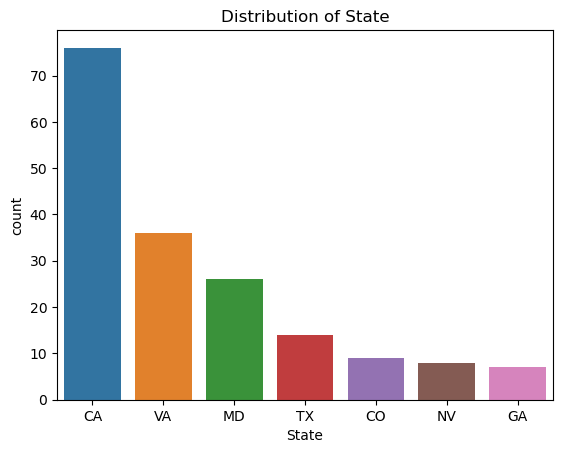

In [35]:
# Bar plot
sns.barplot(x=state.index[1:8], y=state["count"][1:8], hue=state.index[1:8])
plt.title("Distribution of State")
plt.show()

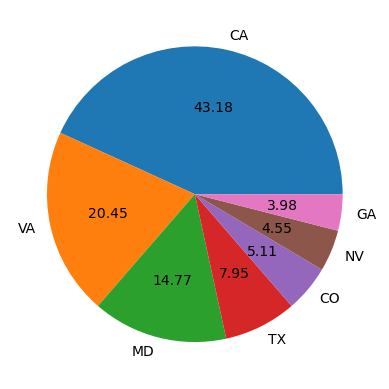

In [36]:
# pie chart
plt.pie(x=state["count"][1:8], labels=state.index[1:8], autopct="%0.2f")
plt.show()

### 5. Bivariate Analysis

#### i) Numerical VS Numerical

In [37]:
df_num.columns

Index(['Postal_Code', 'Model_Year', 'Electric_Range', 'Base_MSRP',
       'Legislative_District', 'DOL_Vehicle_ID', 'Census_Tract_2020'],
      dtype='object')

In [38]:
df_num[["Electric_Range", "Base_MSRP"]].corr()

,Electric_Range,Base_MSRP
Electric_Range,1.000000,0.085025
Base_MSRP,0.085025,1.000000


**Insights:** The correlation between `Electric_Range` and `Base_MSRP` is `0.085025`, which is a very low positive correlation. This means that there is almost `no linear relationship` between the electric range of the vehicle and its price (Base_MSRP)

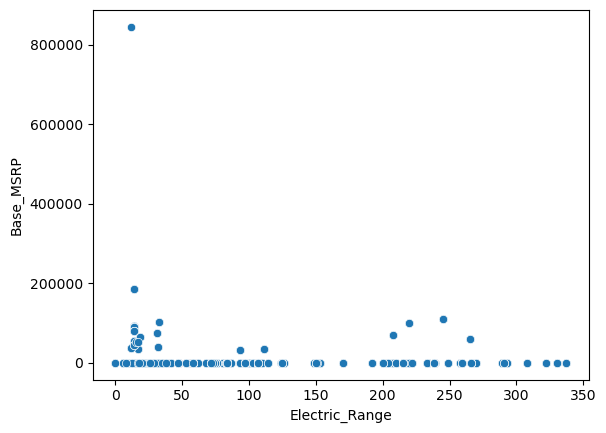

In [39]:
sns.scatterplot(x=df_num["Electric_Range"],y=df_num["Base_MSRP"])
plt.show()

In [40]:
df_num.corr()

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Census_Tract_2020
Postal_Code,1.000000,-0.004485,0.000385,0.001151,-0.060626,0.003365,0.501170
Model_Year,-0.004485,1.000000,-0.288433,-0.229130,0.010408,-0.068295,0.000714
Electric_Range,0.000385,-0.288433,1.000000,0.085025,0.024327,0.009682,0.000722
Base_MSRP,0.001151,-0.229130,0.085025,1.000000,0.012383,0.000504,0.000979
Legislative_District,-0.060626,0.010408,0.024327,0.012383,1.000000,-0.001730,-0.013326
DOL_Vehicle_ID,0.003365,-0.068295,0.009682,0.000504,-0.001730,1.000000,0.002754
Census_Tract_2020,0.501170,0.000714,0.000722,0.000979,-0.013326,0.002754,1.000000


**Insights:**

- `Model_Year vs Electric_Range:` -0.288 (negative correlation).
- `Model_Year vs Base_MSRP:` -0.229 (negative correlation).

**Pair plot**

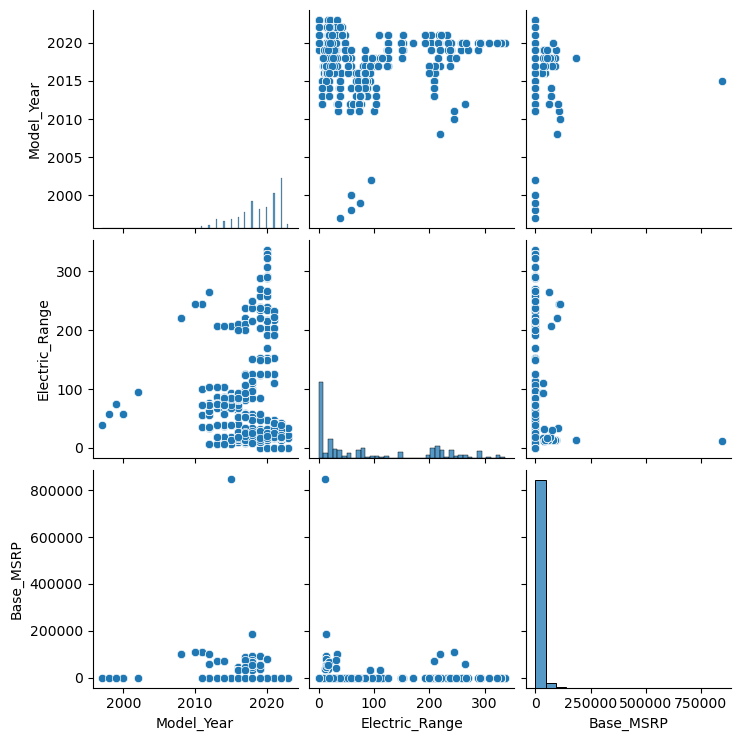

In [41]:
sns.pairplot(df_num[["Model_Year", "Electric_Range", "Base_MSRP"]])

#### ii) Categorical VS Categorical

In [42]:
df_cat.columns

Index(['VIN_1_10', 'County', 'City', 'State', 'Make', 'Model',
       'Electric_Vehicle_Type', 'CAFV_Eligibility', 'Vehicle_Location',
       'Electric_Utility'],
      dtype='object')

**STATE VS ELECTRIC VEHICLE TYPE**

In [43]:
df_cat["Electric_Vehicle_Type"].unique()

array(['Plug-in Hybrid Electric Vehicle (PHEV)',
       'Battery Electric Vehicle (BEV)'], dtype=object)

In [44]:
c1 = pd.crosstab(index=df_cat["State"], columns = df_cat["Electric_Vehicle_Type"]).sort_values(by=["Battery Electric Vehicle (BEV)","Plug-in Hybrid Electric Vehicle (PHEV)"], ascending=False)

c1.head()

Electric_Vehicle_Type,Battery Electric Vehicle (BEV),Plug-in Hybrid Electric Vehicle (PHEV)
State,,
WA,85866,26482
CA,50,26
VA,23,13
MD,14,12
TX,9,5


In [45]:
c1.shape

(45, 2)

In [46]:
c1.columns

Index(['Battery Electric Vehicle (BEV)', 'Plug-in Hybrid Electric Vehicle (PHEV)'], dtype='object', name='Electric_Vehicle_Type')

In [47]:
c1.index

Index(['WA', 'CA', 'VA', 'MD', 'TX', 'CO', 'NV', 'IL', 'AZ', 'DC', 'SC', 'GA',
       'NC', 'FL', 'NE', 'AR', 'NY', 'PA', 'TN', 'OR', 'HI', 'UT', 'KS', 'LA',
       'MA', 'MO', 'ID', 'OH', 'WY', 'CT', 'NH', 'DE', 'MN', 'MS', 'NM', 'RI',
       'SD', 'WI', 'NJ', 'AK', 'AL', 'KY', 'ME', 'ND', 'OK'],
      dtype='object', name='State')

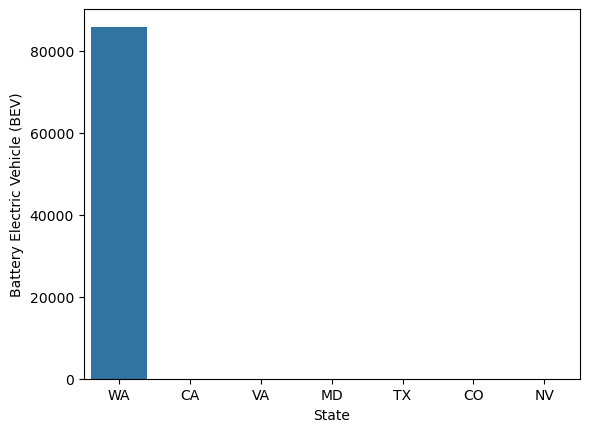

In [48]:
# barplot, State VS BEV
sns.barplot(x=c1.index[:7], y=c1["Battery Electric Vehicle (BEV)"][:7],hue=c1.index[:7])
plt.show()

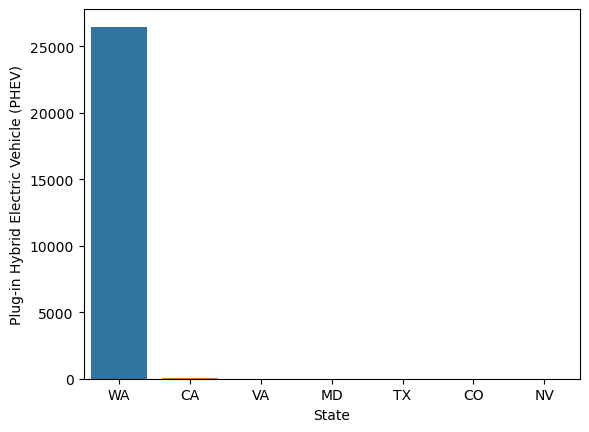

In [49]:
# barplot, State VS PHEV
sns.barplot(x=c1.index[:7], y=c1["Plug-in Hybrid Electric Vehicle (PHEV)"][:7],hue=c1.index[:7])
plt.show()

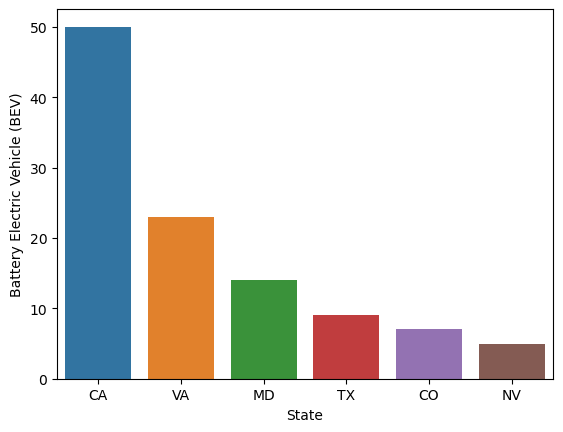

In [50]:
# barplot, State VS BEV (excluding WA)
sns.barplot(x=c1.index[1:7], y=c1["Battery Electric Vehicle (BEV)"][1:7],hue=c1.index[1:7])
plt.show()

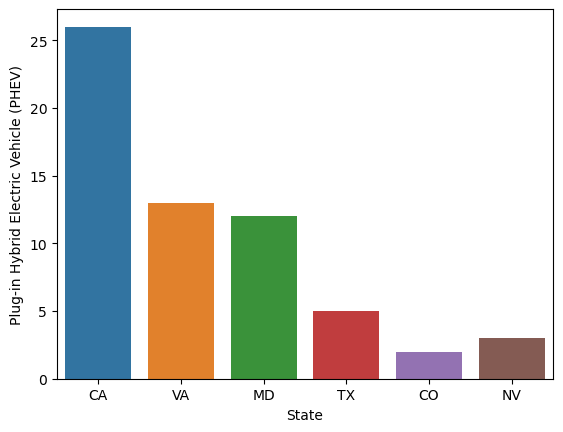

In [51]:
# barplot, State VS PHEV (excluding WA)
sns.barplot(x=c1.index[1:7], y=c1["Plug-in Hybrid Electric Vehicle (PHEV)"][1:7],hue=c1.index[1:7])
plt.show()

#### iii) Numerical VS Categorical

In [52]:
# combining the numeric and categorical dataframes back into the original DataFrame
df.update(df_num)
df.update(df_cat)

In [53]:
df.columns

Index(['VIN_1_10', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility',
       'Electric_Range', 'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', 'Census_Tract_2020'],
      dtype='object')

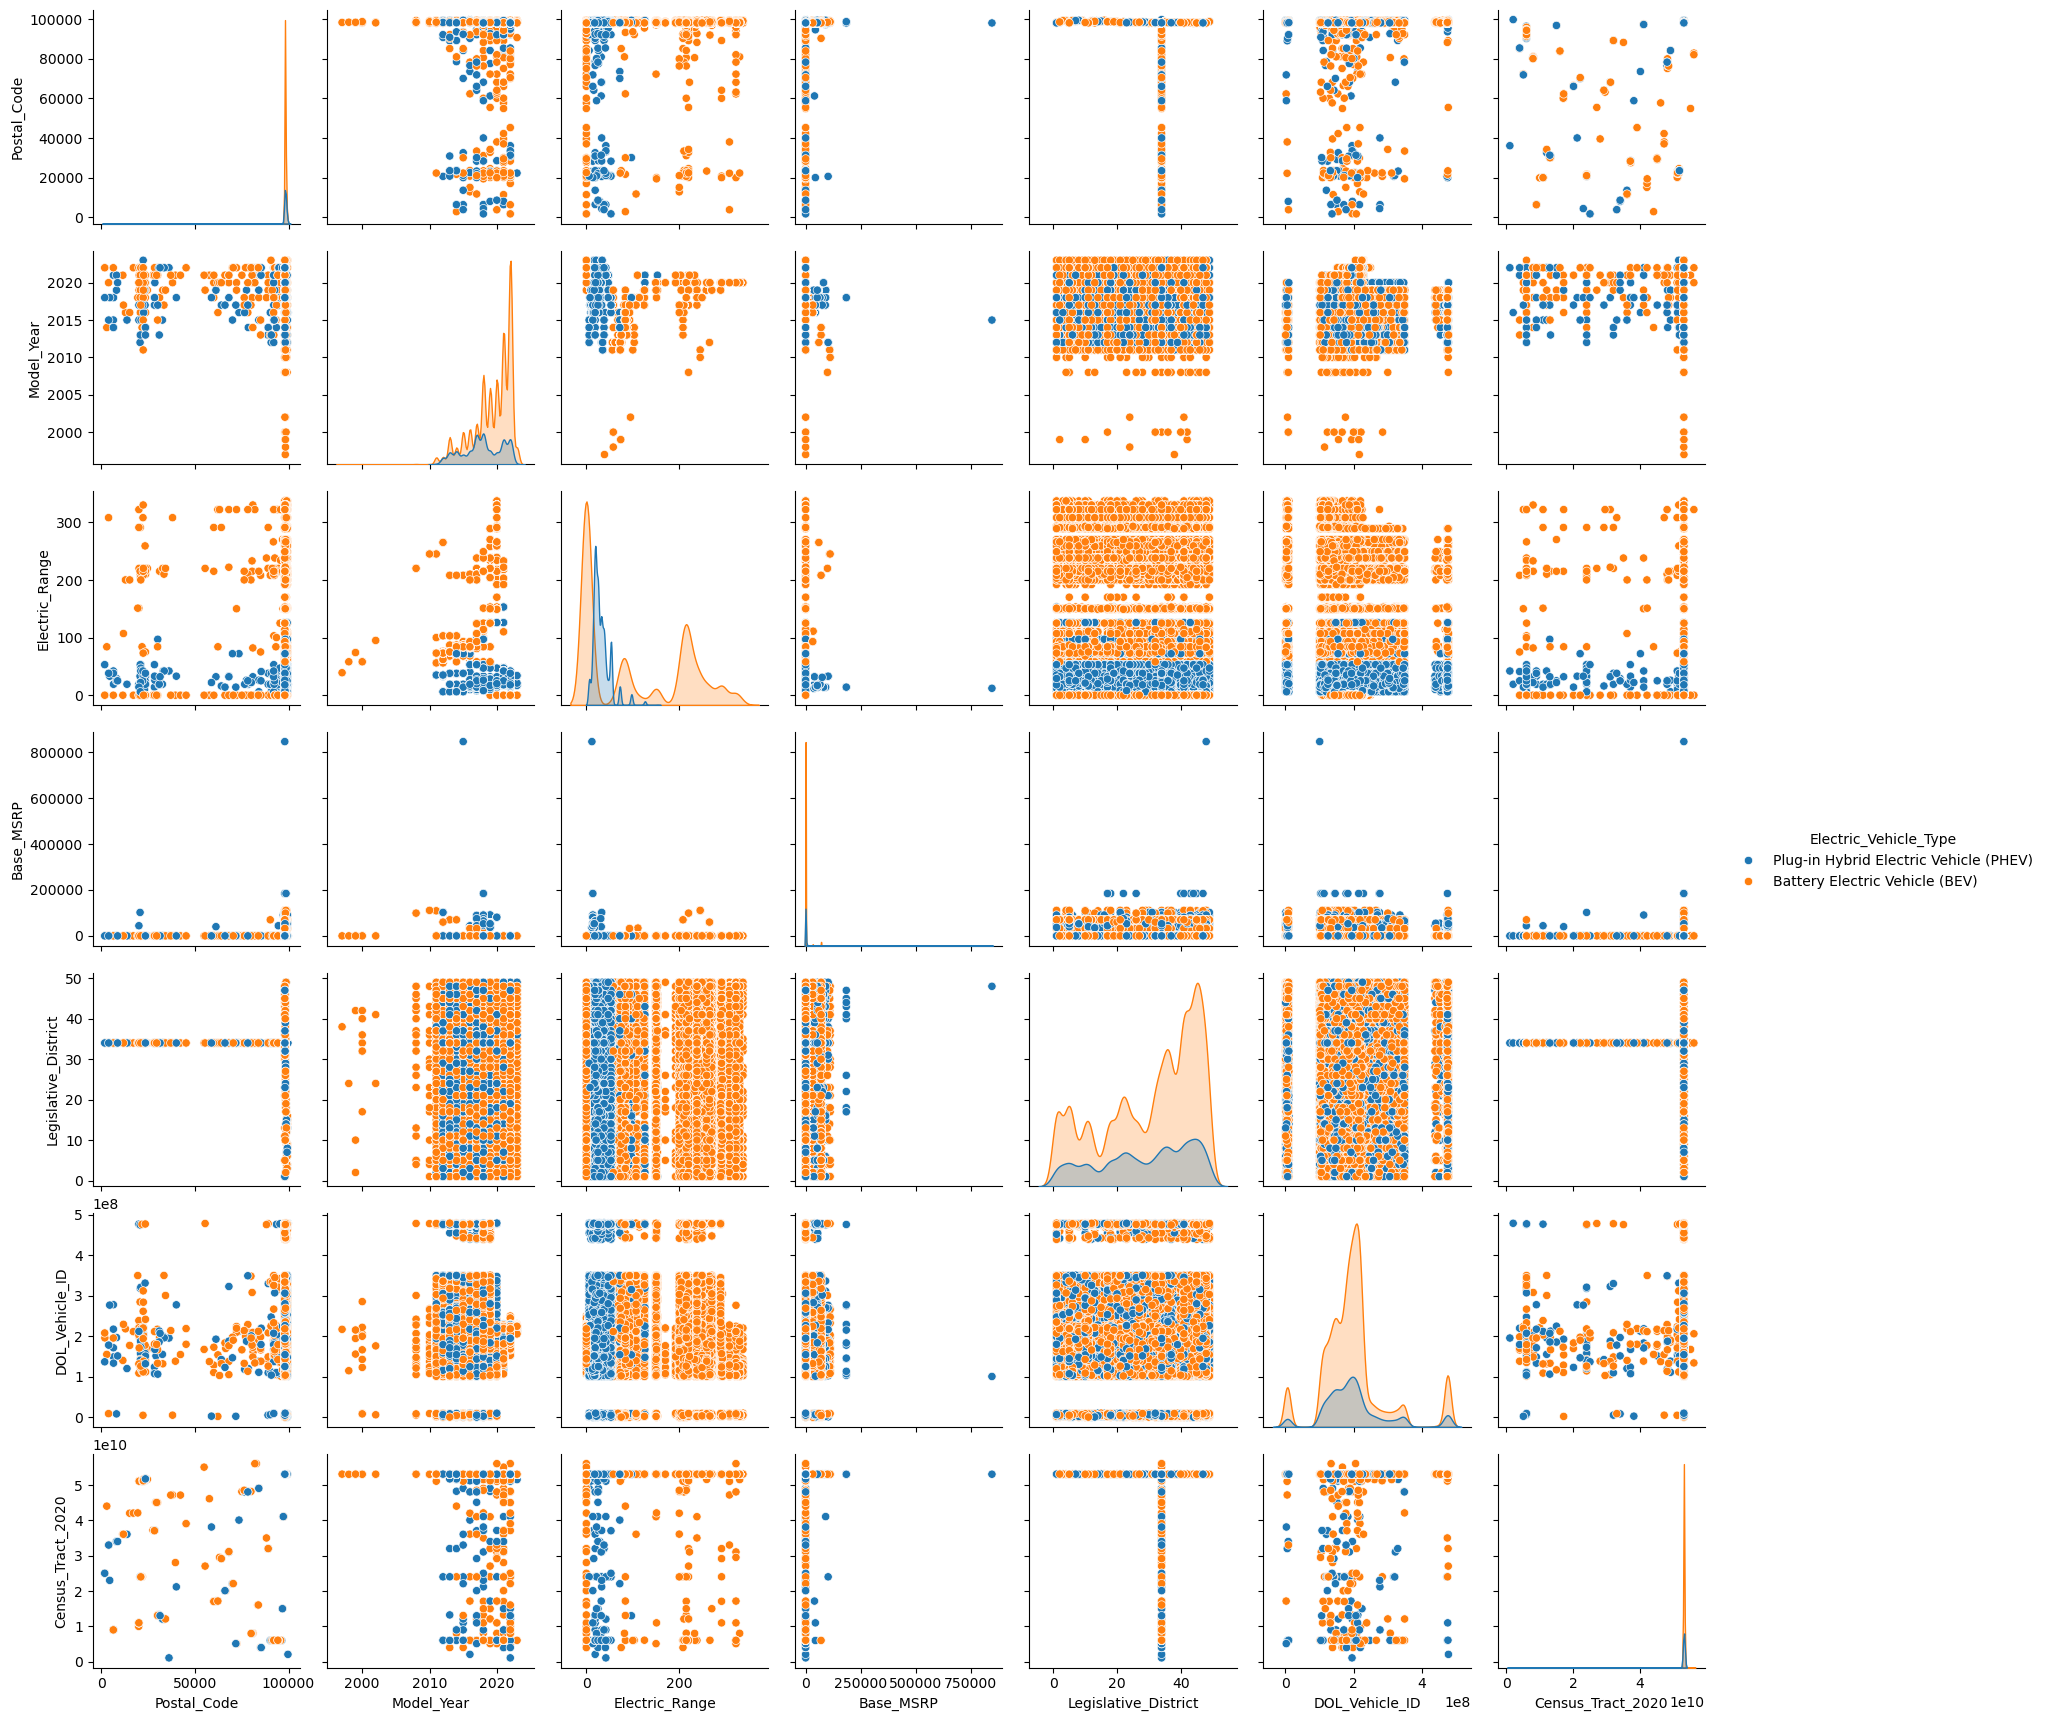

In [54]:
sns.pairplot(df, hue='Electric_Vehicle_Type', diag_kind='kde')
plt.show()

## Task 2: Choropleth using `plotly.express` to display the number of EV vehicles based on location

In [61]:
df.columns

Index(['VIN_1_10', 'County', 'City', 'State', 'Postal_Code', 'Model_Year',
       'Make', 'Model', 'Electric_Vehicle_Type', 'CAFV_Eligibility',
       'Electric_Range', 'Base_MSRP', 'Legislative_District', 'DOL_Vehicle_ID',
       'Vehicle_Location', 'Electric_Utility', 'Census_Tract_2020'],
      dtype='object')

#### Electric Vehicles by State

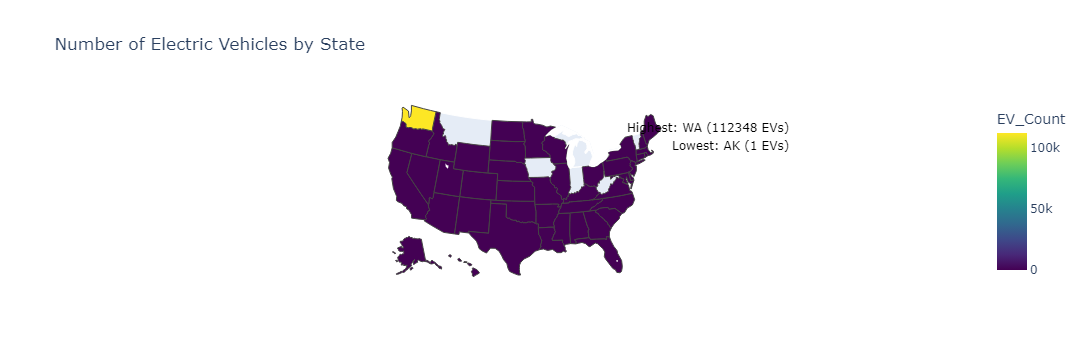

In [76]:
state_data = df.groupby('State')['VIN_1_10'].count().reset_index()
state_data.columns = ['State', 'EV_Count']

fig = px.choropleth(state_data, 
                    locations='State', 
                    locationmode='USA-states', 
                    color='EV_Count', 
                    color_continuous_scale='Viridis', 
                    scope='usa',
                    labels={'EV Count': 'Number of EV Vehicles'},
                    title='Number of Electric Vehicles by State')

max_ev_state = state_data.loc[state_data['EV_Count'].idxmax(), 'State']
max_ev_value = state_data['EV_Count'].max()

min_ev_state = state_data.loc[state_data['EV_Count'].idxmin(), 'State']
min_ev_value = state_data['EV_Count'].min()

fig.add_annotation(
    text=f"Highest: {max_ev_state} ({max_ev_value} EVs)",
    xref="paper", yref="paper",
    x=0.8, y=0.9, showarrow=False,
    font=dict(size=12, color="black")
)

fig.add_annotation(
    text=f"Lowest: {min_ev_state} ({min_ev_value} EVs)",
    xref="paper", yref="paper",
    x=0.8, y=0.8, showarrow=False,
    font=dict(size=12, color="black")
)

fig.show()

## Task 3: Racing Bar Plot to display the animation of EV Make and its count each year

In [79]:
# step 1
!pip install bar-chart-race

   ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/156.8 kB ? eta -:--:--
   --------------- ----------------------- 61.4/156.8 kB 825.8 kB/s eta 0:00:01
   ---------------------------------------  153.6/156.8 kB 1.5 MB/s eta 0:00:01
   ---------------------------------------- 156.8/156.8 kB 1.3 MB/s eta 0:00:00


In [80]:
# step 2
import bar_chart_race as bcr

In [81]:
df.head()

,VIN_1_10,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,CAFV_Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,Census_Tract_2020
0,JTMEB3FV6N,Monroe,Key West,FL,33040,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,34.0,198968248,POINT (-81.80023 24.5545),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),12087972100
1,1G1RD6E45D,Clark,Laughlin,NV,89029,2013,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,34.0,5204412,POINT (-114.57245 35.16815),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32003005702
2,JN1AZ0CP8B,Yakima,Yakima,WA,98901,2011,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,73,0,15.0,218972519,POINT (-120.50721 46.60448),PACIFICORP,53077001602
3,1G1FW6S08H,Skagit,Concrete,WA,98237,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,39.0,186750406,POINT (-121.7515 48.53892),PUGET SOUND ENERGY INC,53057951101
4,3FA6P0SU1K,Snohomish,Everett,WA,98201,2019,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,26,0,38.0,2006714,POINT (-122.20596 47.97659),PUGET SOUND ENERGY INC,53061041500


In [85]:
# step 3, count the number of EVs by 'Make' for each 'Model_Year'
make_year_count = df.groupby(['Model_Year', 'Make']).size().unstack(fill_value=0)

make_year_count.sample(5)

Make,AUDI,AZURE DYNAMICS,BENTLEY,BMW,CADILLAC,CHEVROLET,CHRYSLER,FIAT,FISKER,FORD,...,POLESTAR,PORSCHE,RIVIAN,SMART,SUBARU,TESLA,TH!NK,TOYOTA,VOLKSWAGEN,VOLVO
Model_Year,,,,,,,,,,,,,,,,,,,,,
2021,544,0,1,635,0,377,504,0,0,882,...,98,145,0,0,0,11028,0,935,988,580
2015,0,0,0,403,0,467,0,242,0,556,...,0,33,0,52,0,1089,0,89,124,0
2023,12,0,0,73,0,177,0,0,0,4,...,88,0,0,0,1,890,0,0,69,21
2013,0,0,0,0,0,818,0,106,0,662,...,0,0,0,29,0,814,0,296,0,0
2014,0,0,0,457,58,724,0,97,0,628,...,0,8,0,71,0,683,0,215,0,0


In [ ]:
# step 4, creating a racing bar chart animation

bcr.bar_chart_race(
    # dataframe
    df=make_year_count,

    # save the output video file
    filename='racing_bar_chart.mp4',

    # horizontal bars
    orientation='h',

    # sort descending
    sort='desc',

    # top 7 bars
    n_bars=7,

    # smoothness of the animation
    steps_per_period=30,

    # time period in ms for each row
    period_length=1500,

    # bars size
    bar_size=.95,

    # label axis
    period_label={'x': .99, 'y': .25, 'ha': 'right', 'va': 'center'},

    # label format (int)
    period_fmt='{x:.0f}',

    # figure properties
    figsize=(5, 3),
    dpi=144,
    cmap='dark12',

    # title properties
    title='Year wise sales of each Makers from last decade',
    title_size=10,

    # label properties
    bar_label_size=7,
    tick_label_size=7,

    # font and its styles
    shared_fontdict={'family' : 'Helvetica', 'color' : '.1'},

    # adjust the style of bar
    # alpha is opacity of bar
    # ls - width of edge
    bar_kwargs={'alpha': .99, 'lw': 0})

In [2]:
# step 5, display the video

from IPython.display import Video
Video("racing_bar_chart.mp4", embed=True)

## Conclusion

This project successfully analyzed and visualized the distribution and growth of electric vehicles (EVs) across the United States. By leveraging various data analysis and visualization techniques, we were able to extract meaningful insights into the EV market trends.

## Thank you
If you enjoyed this notebook, please consider sharing it.

Author:
`Sri Charan Thoutam`

- 👉Shoot me mails : thoutamsricharan@gmail.com
- 👉Connect on LinkedIn: [linkedin.com/in/codewithcharan](https://www.linkedin.com/in/codewithcharan/)
- 👉Explore my Portfolio: [codewithcharan.github.io/My-Portfolio](https://codewithcharan.github.io/My-Portfolio/)
- 👉Explore my GitHub: [github.com/CodeWithCharan](https://github.com/CodeWithCharan)